In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
plt.style.use('bmh')

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
df=pd.read_csv('http://bit.ly/w-data')

In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'Scores')

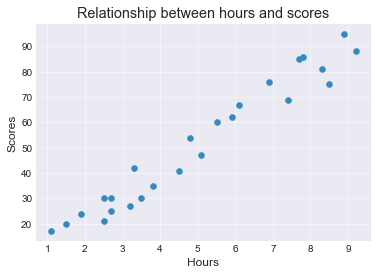

In [6]:
#ploting the relationship between hours and scores
plt.scatter(df['Hours'],df['Scores'])
plt.title('Relationship between hours and scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [7]:
#spliting the dependent and independent variable
x=df[['Hours']]
y=df[['Scores']]

In [8]:
#Appling train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75, random_state=0)

In [9]:
#z_score computation
def detect_outliers(data):
    outliers=[]
    threshold=3 #it is a outlier if it is more than 3 standard deviation
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold: #np.abs means absolute value that is round off
            outliers.append(i)
    if len(outliers)==0:
        print('There are no outliers')
    else:
        return outliers

In [10]:
#checking outliers in train data by z_score
detect_outliers(x_train.values)

There are no outliers


In [11]:
#Appling LinearREgression 
regression_model=LinearRegression().fit(x_train, y_train)

In [12]:
#testing train accuracy
regression_model.score(x_train,y_train)

0.9466908619322414

In [13]:
#testing Test accuracy
regression_model.score(x_test,y_test)

0.9478707230647945

Text(0.5, 1.0, 'Regression line')

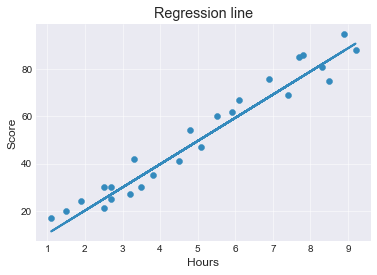

In [14]:
#ploting the regression line
#y=mx+c
line=regression_model.coef_*x+regression_model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Regression line')

In [15]:
y_pred=regression_model.predict(x_test)

Text(0, 0.5, 'Residual')

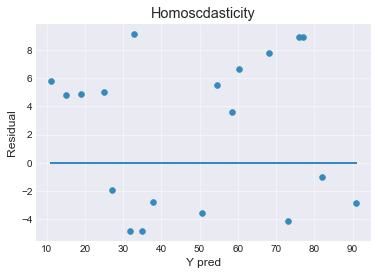

In [16]:
#checking the spread of residual
residual=y_test-y_pred
plt.scatter(y_pred,residual)
st_line=x_test*0
plt.plot(y_pred,st_line)
plt.title('Homoscdasticity')
plt.xlabel('Y pred')
plt.ylabel('Residual')

In [17]:
x_train_constant=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train_constant).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     71.03
Date:                Sat, 05 Mar 2022   Prob (F-statistic):            0.00109
Time:                        14:54:13   Log-Likelihood:                -19.184
No. Observations:                   6   AIC:                             42.37
Df Residuals:                       4   BIC:                             41.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4276      6.869      0.062      0.9

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [19]:
mean_absolute_error(y_pred,y_test)

5.102025407722985

# prediction

In [20]:
#the predicton score if a stdent study for 9.25 Hours
hours=np.array(9.25)
hours=hours.reshape(-1,1)
hours

array([[9.25]])

In [21]:
regression_model.predict(hours)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[91.31374661]])